In [1]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

os.chdir('/Users/qdo/injected12_7/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
data5 = np.concatenate(data, axis=1)
del data

os.chdir('/Users/qdo/injected12_9/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
data6 = np.concatenate(data, axis=1)
del data

os.chdir('/Users/qdo/injected12_15/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
data7 = np.concatenate(data, axis=1)
del data

data5= np.concatenate([data5,data6,data7],axis=1)


2022-12-07 12:59:03.458809
2022-12-07 13:59:03.555035
2022-12-07 14:59:03.555036
2022-12-07 15:59:03.555046
2022-12-09 12:59:03.501037
2022-12-09 13:59:03.501024
2022-12-09 14:59:03.501023
2022-12-09 15:59:03.501034
2022-12-15 12:59:03.436038
2022-12-15 13:59:03.436035
2022-12-15 14:59:03.436035
2022-12-15 15:59:03.436035


In [2]:
del data6
del data7

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [4]:
from scipy import signal
import mne
def processData(data):
    eeg = ((data[0,:]-2)*1000).reshape(-1) 
    eeg=signal.detrend(eeg)
    sf = 1000.
    times = np.arange(eeg.size)/sf
    # Plot the signal
    emg = ((data[1,:]-2)*1000).reshape(-1) 
    sf = 1000.
    lab1 = ((data[4,:])).reshape(-1) 
    sf = 1000.
    lab2 = ((data[5,:])).reshape(-1) 
    label = np.zeros_like(lab1)
    first_flash = 0
    flashcount = 0
    for i in range(0,len(lab1)):
        if (lab1[i] == 0) and (lab2[i] == 0):
            label[i] = 1
        elif (lab1[i] == 0) and (lab2[i] > 0):
            label[i] = 2
        elif (lab1[i] > 0) and (lab2[i] == 0):
            label[i] = 3
            first_flash = 1
        else:
            if (first_flash == 1) and (flashcount ==0): 
                label[i] = 4
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    first_flash = 0
                    flashcount = flashcount + 1
            elif (flashcount == 1):
                label[i] = 5            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 2):
                label[i] = 6            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 3):
                label[i] = 7            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 4):
                label[i] = 8            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 5):
                label[i] = 9            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 6):
                label[i] = 10            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 7):
                label[i] = 11            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 8):
                label[i] = 12           
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 9):
                label[i] = 13          
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            else:
                label[i] = 14   
                flashcount = 0
    n_channels = 3
    sampling_freq = 1000  # in Hertz
    info = mne.create_info(n_channels, sfreq=sampling_freq)
    #print(info)
    ch_names = ['EEG001','EEG002','STIM1'] 
    ch_types = ['eeg','eeg','stim']
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    #print(info)
    info['description'] = 'My custom dataset'
    #print(info)
    rawdata= np.array([eeg/1000000,emg/1000000,label])
    simulated_raw = mne.io.RawArray(rawdata, info)
    raw_downsampled = simulated_raw.copy().resample(sfreq=200)
    return raw_downsampled
d5 = processData(data5)
del data5

Creating RawArray with float64 data, n_channels=3, n_times=43189012
    Range : 0 ... 43189011 =      0.000 ... 43189.011 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
10638 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
10634 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]


20580 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-282>:12: RuntimeWarning: event 1 missing from event_id will be ignored
</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-282>:12: RuntimeWarning: event 14 missing from event_id will be ignored
</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-282>:12: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.


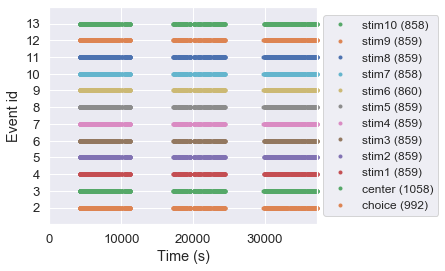

In [5]:
#this shortest duration is very sensitive
events5 = mne.find_events(d5, stim_channel=['STIM1'],shortest_event=1,min_duration=0.0001,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
              'stim2':5,
              'stim3':6,
              'stim4':7,
              'stim5':8,
              'stim6':9,
              'stim7':10,
              'stim8':11,
             'stim9':12,
              'stim10':13,
             'center':3}
#events0 = mne.merge_events(events0, [5,6,7,8,9,10,11,12,13], 14)

#event_dict = {'choice':2,
#              'stimall':14,
#             'center':3}

#epochs5 = mne.Epochs(d5, events5,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
fig = mne.viz.plot_events(events5, event_id=event_dict, sfreq=d5.info['sfreq'],
                          first_samp=d5.first_samp)

20227 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Not setting metadata
10461 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 10461 events and 301 original time points ...
0 bad epochs dropped
Not setting metadata
1057 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-6-40b37f810666>:23: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  show=False)


[<Figure size 432x288 with 3 Axes>]

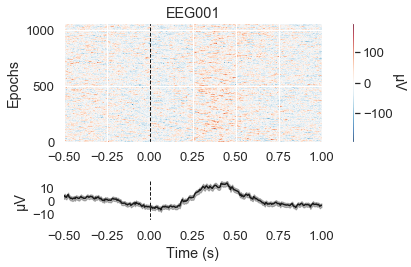

In [6]:
events5 = mne.find_events(d5, stim_channel=['STIM1'],shortest_event=2,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
              'stim2':5,
              'stim3':6,
              'stim4':7,
              'stim5':8,
              'stim6':9,
              'stim7':10,
              'stim8':11,
             'stim9':12,
              'stim10':13,
             'center':3}
#events0 = mne.merge_events(events0, [5,6,7,8,9,10,11,12,13], 14)

#event_dict = {'choice':2,
#              'stimall':14,
#             'center':3}

epochs = mne.Epochs(d5, events5,event_id=event_dict, tmin=-0.5, tmax=1, preload=True,event_repeated='drop')

mne.viz.plot_epochs_image(epochs['center'],picks=['EEG001'], sigma=.5,
                     show=False)

In [7]:
import datajoint as dj
from dj_ratacad import flashcount
data=(flashcount.FlashCountTrial() & 'name = "Sriracha"' & 'outcome != "Omission"').fetch(format="frame")
data = data.reset_index(level=['trial_datetime', 'stage'])


#from dj_ratacad import flashes
#data=(flashes.FlashesTrial() & 'name = "1062"' & 'outcome != "Omission"').fetch(format="frame")
#data = data.reset_index(level=['trial_datetime', 'stage'])


import pandas as pd
data['Date'] = pd.to_datetime(data['trial_datetime']).dt.date
data['Hour'] = pd.to_datetime(data['trial_datetime']).dt.hour

DataJoint verified plugin `datajoint_connection_hub` detected.
Connecting qdo@buaws-aws-cf-rds-mysql-prod.cenrervr4svx.us-east-2.rds.amazonaws.com:3306


In [8]:
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = str(time_str).split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
data['Time'] = pd.to_datetime(data['trial_datetime'],utc=True).dt.time
data['Datetime'] = pd.to_datetime(data['trial_datetime'],utc=True)
data['S'] = data['Time'].apply(get_sec)
#ts = pd.Timestamp('2022-12-14T18:59:00',tz='EST')
#tstop = pd.Timestamp('2022-12-15T19:59:00',tz='EST')
#timestart = pd.to_datetime(ts.tz_convert(tz='UTC'))
#timestop = pd.to_datetime(tstop.tz_convert(tz='UTC'))
#print(timestart)
#print(timestop)
dt3 = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,15,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,16,0,0))]
dt2 = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,9,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,10,0,0))]
dt = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,7,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,8,0,0))]

dt = pd.concat([dt,dt2,dt3])

In [9]:
dt

trial_datetime  stage  \
name     session_datetime    trial task                               
Sriracha 2022-12-07 13:09:10 1     count 2022-12-07 13:09:10      5   
                             2     count 2022-12-07 13:09:30      5   
                             3     count 2022-12-07 13:09:38      5   
                             4     count 2022-12-07 13:09:42      5   
                             5     count 2022-12-07 13:09:51      5   
...                                                      ...    ...   
         2022-12-15 12:15:14 356   count 2022-12-15 14:18:50      5   
                             357   count 2022-12-15 14:19:56      5   
                             358   count 2022-12-15 14:20:06      5   
                             359   count 2022-12-15 14:20:14      5   
                             360   count 2022-12-15 14:20:22      5   

                                             choice  outcome      rt  \
name     session_datetime    trial task                                
Sriracha 2022-12-07 13:09:10 1     count      right    error  1.5068   
                             2     count      right    error  1.4730   
                             3     count       left  correct  1.4802   
                             4     count      right  correct  1.4138   
                             5     count      right    error  1.4409   
...                                             ...      ...     ...   
         2022-12-15 12:15:14 356   count  earlyleft    early  1.3201   
                             357   count       left    error  1.6015   
                             358   count       left    error  2.0994   
                             359   count       left    error  2.0131   
                             360   count      right    error  1.8039   

                                          init_time correct_side  lambda_left  \
name     session_datetime    trial task                                         
Sriracha 2022-12-07 13:09:10 1     count    15.9661         left     0.734845   
                             2     count     3.0525         left     0.765461   
                             3     count     0.8807         left     0.703653   
                             4     count     5.2456        right     0.217274   
                             5     count     2.7251         left     0.723446   
...                                             ...          ...          ...   
         2022-12-15 12:15:14 356   count    62.2804        right     0.252223   
                             357   count     5.2794        right     0.261375   
                             358   count     2.3023        right     0.266263   
                             359   count     3.1085        right     0.245365   
                             360   count     0.6489         left     0.701446   

                                          lambda_right  flash_bins  ... probe  \
name     session_datetime    trial task                             ...         
Sriracha 2022-12-07 13:09:10 1     count      0.234316           0  ...     0   
                             2     count      0.287302           0  ...     0   
                             3     count      0.220732           0  ...     0   
                             4     count      0.715695           0  ...     0   
                             5     count      0.256261           0  ...     0   
...                                                ...         ...  ...   ...   
         2022-12-15 12:15:14 356   count      0.799676           0  ...     0   
                             357   count      0.745890           0  ...     0   
                             358   count      0.798035           0  ...     0   
                             359   count      0.733349           0  ...     0   
                             360   count      0.210269           0  ...     0   

                                         freerw  isprobe  reversal heavy_tail

20227 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-282>:12: RuntimeWarning: event 1 missing from event_id will be ignored
</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-282>:12: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.


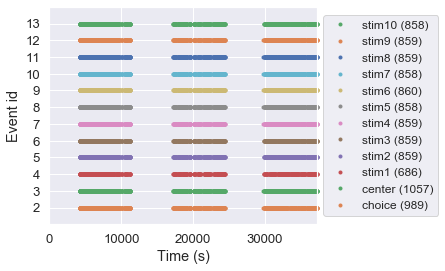

(20227, 3)
(2046, 3)


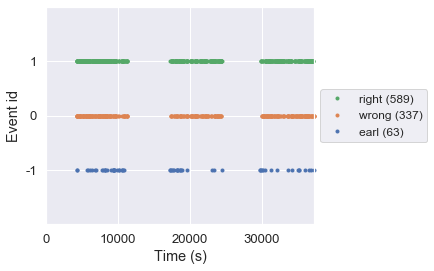

Not setting metadata
989 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 989 events and 321 original time points ...
0 bad epochs dropped


In [10]:
#this shortest duration is very sensitive
events5 = mne.find_events(d5, stim_channel=['STIM1'],shortest_event=2,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
              'stim2':5,
              'stim3':6,
              'stim4':7,
              'stim5':8,
              'stim6':9,
              'stim7':10,
              'stim8':11,
             'stim9':12,
              'stim10':13,
             'center':3}
#events0 = mne.merge_events(events0, [5,6,7,8,9,10,11,12,13], 14)

#event_dict = {'choice':2,
#              'stimall':14,
#             'center':3}

#epochs5 = mne.Epochs(d5, events5,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
fig = mne.viz.plot_events(events5, event_id=event_dict, sfreq=d5.info['sfreq'],
                          first_samp=d5.first_samp)
print(events5.shape)
event_simple = mne.pick_events(events5, exclude=[1,4,5,6,7,8,9,10,11,12,13,14])
print(event_simple.shape)
savedEvent = []
#align to start of Trial!
for i in range(event_simple.shape[0]):
    if event_simple[i,2] == 3: #center
        if (i+1) < event_simple.shape[0]:
            if event_simple[i+1,2] == 2: #choice
                savedEvent.append(event_simple[i,:])
            else:
                pass
savedEvent = np.array(savedEvent)
savedEvent.shape
#align by center + choice
choiceLabel = np.array(dt.loc[:,"choice"])
rewardLabel = np.array(dt.loc[:,"outcome"])
CenterEvent=savedEvent[savedEvent[:,2]==3] #center
CenterEvent.shape
for i in range(len(choiceLabel)):
    if (choiceLabel[i] == "left") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 0 #left wrong
    elif (choiceLabel[i] == "left") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 1#Left correct
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 0 #right wrong
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 1 #right correct
    elif choiceLabel[i] == "earlyleft":
        choiceLabel[i] = -1 #early left
    else:
        choiceLabel[i] = -1 #early right
CenterEvent[:,2] = choiceLabel
event_dict2 = {'wrong':0,
             'right':1,
              'earl':-1}
             #'right_wrong':17,
             #'right_right':18}
             #'early_left':19,
             #'early_right':20}

        
fig = mne.viz.plot_events(CenterEvent, event_id=event_dict2, sfreq=d5.info['sfreq'],
                          first_samp=d5.first_samp)
center_epochs = mne.Epochs(d5, CenterEvent,event_id=event_dict2, tmin=-0.1, tmax=1.5, preload=True,event_repeated='drop')
#lw_evoked = center_epochs['left_wrong'].average()
#rw_evoked = center_epochs['right_wrong'].average()
#l_evoked = center_epochs['left_right'].average()
#r_evoked = center_epochs['right_right'].average()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

print(__doc__)

# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after


# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier


# Define a monte-carlo cross-validation generator (reduce variance):


Automatically created module for IPython interactive environment


In [12]:
epochs_train = center_epochs.copy() #.crop(tmin=0.5, tmax=1)
labels = center_epochs.events[:, -1] 
print(labels)

epochs_data_train = epochs_train.get_data()
#print(epochs_data_train.shape)
#plt.plot(epochs_data_train[0,2,:])
#import mne
#from mne.decoding import ReceptiveField
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import scale

#idx1 = np.where(epochs_data_train[:,2,:] > 3)
#idx2 = np.where(epochs_data_train[:,2,:] <= 3)
##epochs_data_train[idx1[0],2,idx1[1]] = 1
#epochs_data_train[idx2[0],2,idx2[1]] = 0

#fig, ax = plt.subplots()
#lns = ax.plot(center_epochs.times,scale(epochs_data_train[0,0,:]), color='k', alpha=.1)
#ln1 = ax.plot(center_epochs.times,(epochs_data_train[0,2,:]), color='r', lw=2)
#ax.legend([lns[0], ln1[0]], ['EEG', 'Speech Envelope'], frameon=False)
#ax.set(title="Sample activity", xlabel="Time Bin")
#mne.viz.tight_layout()



[ 0  0  1  1  0  0 -1  1  0  1  1  1 -1  0  1  0  0  1  0  1  1  1  1  1
  1  0  1  1  0  1  0  0  0  0  0  1  1  1  1  1  1  0  1  1  1  1  1  1
  1  1  1  1  0  1  0  0  0  1  1  1  0  1  0  1  1  0  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  0  0  1  1  1  0  0  0  0  1  1  1  1  1
  1  1 -1  1  1  1  1  0  1  0  0  0  1  1  1  1  1 -1  1  1  1  1  1  0
  1  0  1  0  1  1  0  1  1  1  1  1 -1  0  0  0  0  0  1  0  1  1  1 -1
  0  1  0  0  1  1  1  1  1  0  0  1  0  1  1  1  0  1  1  1  1 -1  1  0
  0  1  0  1  1 -1  1  1  1  0  1  1  1  1  1  1  0  0  1  1  1  1  1  1
  1  0  0  1  1  0  1  1  0  1  0  0  0  1  0  0  1  1  0  0  1  1  1  0
  1  0 -1  1  1  1  0  1  0  1  0  1  1  0  0  1 -1  1  1  1  1  0  1  1
  1  0  1  0  0  1  1 -1  1  1  1  1  1  1  0  0  1 -1 -1  1  1  0  0  0
  1  0  0  1  1  0  0  0  0  0  1  1  0  0  1  0  1  1  1 -1  0  1  1  1
  1  1  1  0  1  1  1  0  1  0  1  0  1  0  1  0  0  1  0  1  1  1  0  1
 -1  1  1  1  1  1  0  1  0  1  0  1 -1 -1  1  1  1

In [15]:
import matplotlib.pyplot as plt

import mne
from sklearn.preprocessing import StandardScaler
import numpy as np
def nextexp(value, base=2):
    """
    Given a value and an optional base, this function returns the exponent for
    the smallest powers of the specified base that satisfy:
    base**exponent >= |value|.

    Parameters
    ----------
    value : numeric
        The value that will be compared to the succesive powers of the base
        until the previous condition is met.
    base : numeric, optional
        The base of the power. Default value is 2.

    Returns
    -------
    int
        Exponent that meets the previous condition.

    """
    exponent = 0
    while base ** exponent < np.abs(value):
        exponent += 1
    return exponent

def mne_stockell_power(data, samplingrate, window_lenght = [-1,3], freq_range = [0,100]):
    """
        Computes a high temporal and frequency resolution spectrogram and intertrial coherence
        using the mne.time_frequency.tfr_array_stockwell function (https://mne.tools/stable/generated/mne.time_frequency.tfr_array_stockwell.html).
        It is set up to have a time resolution of 10ms and a frequency resolution depends on the window length.

        Parameters
        ----------
        data : ndarray
            The shape has to be (n_epochs, n_channels, n_times).
            For instance the shape for 2 events, 3 channels and 3000 points
            (3 seconds sampled at 1000) would be (1, 3, 3000)
        samplingrate : numeric
            Sampling frequency in Hz
        window_lenght: list, two numbers
            The seconds before the start of the trial, first number, and after
            the start of the trial, second number, that you want to plot.
        freq_rage: list, two numbers
        The frequency range that you want to calculate.


        Returns
        -------
        st_power: ndarray
            The multitaper power of the Stockwell transformed data.
            The last two dimensions are frequency and time. Shape (n_channels, n_freqs, n_time).
            It should have the same lenght of freqs, dimension 2, and time, dimension 3.
        itc: ndarray
        The intertrial coherence. Only returned if return_itc is True.
        Inter-trial coherence (ITC) is a measure that is computed from single trial EEG,
        which reflects the temporal and spectral synchronization within EEG,
        elucidating the extent to which underlying phase-locking occurs
        freqs: ndarray
        The points of frequencies that correspond to the frequencies calculated.
        Y axis spectrogram
        time: ndarray
        The points of time that correspond to the windowlenght,
        X axis spectrogram
        """


    st_power, itc, freqs = mne.time_frequency.tfr_array_stockwell(
        data, samplingrate, fmin=freq_range[0], fmax=freq_range[1],
        n_fft= np.power(2, nextexp(data.shape[-1], base=2)), width=1,
        decim=int(samplingrate / 100), return_itc=True)
    time = np.linspace(window_lenght[0], window_lenght[1], st_power.shape[-1])

    return st_power, itc, freqs, time

def plot_spectrograms(st_power, itc, freqs, time, freq_range = [0,100], cmap = 'jet', title = '' , channel = 0):
    """
    Simple function to plot

    st_power: ndarray
        The spectogram o itc data from the  mne_stockell_power funtion
    freqs: ndarray
        The points of frequencies that correspond to the frequencies calculated.
        Y axis spectrogram
    time: ndarray
        The points of time that correspond to the windowlenght,
        X axis spectrogram
    freq_rage: list, two numbers
        The frequency range that you want to calculate.
    cmap: string
        Colormap of the plot
    title: string
        Title of the plot
    channel: integer
        channel that you want to plot. Default 0, so it can also plot the mean of all channels (1 dimension).
    return:
    Plot
    """
#vmin=freq_range[0], vmax=freq_range[1]
    import matplotlib
    fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1] + [0.2],
                    'wspace': 0.2, 'hspace': 0.1})
    fig.suptitle(title, x=0.5, y=0.95)
    scaler = StandardScaler()
    data=(st_power[channel,:,:])
    scaler.fit(data)
    toshow = scaler.transform(data)
    im = ax[0].imshow(
        (toshow), cmap=cmap, aspect='auto',
        interpolation='hanning',
        origin='lower', extent=(time[0],
                                time[-1], freqs[0],
                                freqs[-1]))
    fig.colorbar(im, cax=ax[1], orientation='vertical')
    plt.show()
    return None


[  0   1   4   5   7  11  13  14  16  23  26  28  29  30  31  32  39  50
  52  53  54  58  60  63  69  80  81  85  86  87  88 100 102 103 104 115
 117 119 122 128 129 130 131 132 134 138 140 141 147 148 150 154 160 161
 163 169 176 177 185 186 189 192 194 195 196 198 199 202 203 207 209 213
 215 217 220 221 227 231 233 234 243 244 248 249 250 252 253 256 257 258
 259 260 263 264 266 270 277 281 283 285 287 289 290 292 296 303 305 307
 314 317 322 325 333 335 336 339 341 352 356 357 358 360 362 364 368 370
 371 373 376 379 380 384 392 393 394 399 400 407 410 411 413 419 420 424
 426 427 429 430 440 444 448 450 454 459 460 461 462 463 464 469 471 473
 474 477 479 481 482 483 485 488 490 493 496 501 504 505 506 508 509 513
 517 522 524 526 528 529 533 537 541 542 547 549 550 552 553 554 555 559
 567 571 579 587 590 592 595 598 600 602 603 604 606 609 612 615 616 621
 622 624 631 639 640 641 642 645 646 647 648 649 650 653 656 659 663 664
 666 667 668 670 677 681 684 686 690 691 693 694 69

<ipython-input-15-6cd25dd26344>:75: RuntimeWarning: The input signal is shorter (801) than "n_fft" (1024). Applying zero padding.
  decim=int(samplingrate / 100), return_itc=True)


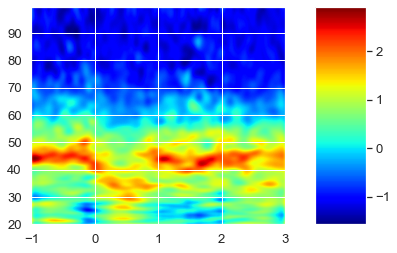

<ipython-input-15-6cd25dd26344>:75: RuntimeWarning: The input signal is shorter (801) than "n_fft" (1024). Applying zero padding.
  decim=int(samplingrate / 100), return_itc=True)


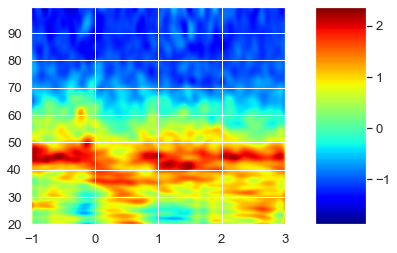

In [16]:
idx3 = np.where(labels==0)
print(idx3[0])
#st_power, itc, freqs, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
#plot_spectrograms(st_power, freqs,time)

st_power1, itc1, freqs1, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
plot_spectrograms(st_power1, itc1, freqs1,time)

idx3 = np.where(labels==1)
#print(idx3[0])
#st_power, itc, freqs, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
#plot_spectrograms(st_power, freqs,time)

st_power2, itc2, freqs2, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
plot_spectrograms(st_power2,itc2, freqs2,time)

#print(st_power)

In [ ]:
print(st_power1.shape)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)


scores = []
epochs_data = center_epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.3, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
#lda = LinearDiscriminantAnalysis()
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
#st_power, itc, freqs, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
#plot_spectrograms(st_power, freqs,time)

#st_power1, itc1, freqs1, time = mne_stockell_power(epochs_data_train[:,0:1,:],200,window_lenght=[-2,3],freq_range = [0,100])
#plot_spectrograms(st_power1, itc1, freqs1,time)


clf = make_pipeline(
    Vectorizer(),
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([('CSP', csp), ('LDA', lda)])
#clf = Pipeline([('LDA', lda)])

scores = cross_val_score(clf,epochs_data_train[:,0:1,:], labels, cv=cv, n_jobs=None)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))


Classification accuracy: 0.594604 / Chance level: 0.636069


Text(0.5, 1.0, 'Sensor space decoding')

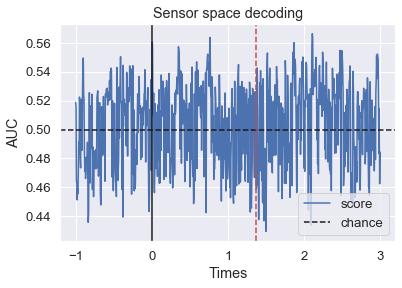

In [18]:
time_decod = SlidingEstimator(
    clf, n_jobs=1, scoring='roc_auc', verbose=True)
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, epochs_data_train[:,0:1,:], labels, cv=4, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(center_epochs.times, scores, label='score')
ax.axhline(0.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.axvline(1.375, linestyle='--', color='r', label='GoCue')

ax.set_title('Sensor space decoding')


In [ ]:
# define the Temporal generalization object
time_gen = GeneralizingEstimator(clf, n_jobs=1, scoring='roc_auc',
                                 verbose=True)

# again, cv=3 just for speed
scores = cross_val_multiscore(time_gen, epochs_data_train[:,0:1,:],labels, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
fig, ax = plt.subplots()
ax.plot(center_epochs.times, np.diag(scores), label='score')
ax.axhline(0.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Decoding MEG sensors over time')

In [ ]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(scores, interpolation='lanczos', origin='lower', cmap='RdBu_r',
               extent=center_epochs.times[[0, -1, 0, -1]], vmin=0., vmax=1.)
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Temporal generalization')
ax.axvline(0, color='k')
ax.axhline(0, color='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('AUC')

In [ ]:
#this is to decode the choice

In [ ]:
# Define a unique pipeline to sequentially:
#do this to EEG is better
clf = make_pipeline(
    Vectorizer(),                       # 1) vectorize across time and channels
    StandardScaler(),                   # 2) normalize features across trials
    LinearModel(                        # 3) fits a logistic regression
        LogisticRegression(solver='liblinear')
    )
)
clf.fit(epochs_data_train, labels)

time_decod = SlidingEstimator(
    clf, n_jobs=1, scoring='roc_auc', verbose=True)
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, epochs_data_train, labels, cv=4, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(center_epochs.times, scores, label='score')
ax.axhline(class_balance, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.axvline(1.375, linestyle='--', color='r', label='GoCue')

ax.set_title('Sensor space decoding')

In [16]:
#align by Choice
choiceLabel = np.array(dt.loc[:,"choice"])
rewardLabel = np.array(dt.loc[:,"outcome"])
ChoiceEvent=events5[events5[:,2]==2] #choice
print(ChoiceEvent.shape)
print(len(choiceLabel))
for i in range(len(choiceLabel)):
    if (choiceLabel[i] == "left") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 0 #left wrong
    elif (choiceLabel[i] == "left") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 1 #Left correct
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 0#right wrong
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 1 #right correct
    elif choiceLabel[i] == "earlyleft":
        choiceLabel[i] = -1 #early left
    else:
        choiceLabel[i] = -1 #early right
ChoiceEvent[:,2] = choiceLabel
event_dict2 = {'wrong':0,
             'right':1,
              'earl':-1}
             #'right_wrong':17,
             #'right_right':18}
             #'early_left':19,
             #'early_right':20}
choice_epochs = mne.Epochs(d5, ChoiceEvent,event_id=event_dict2, tmin=-3, tmax=1, preload=True,event_repeated='drop')
epochs_train2 = choice_epochs.copy().crop(tmin=0, tmax=0.5)
epochs_train = choice_epochs.copy()

labels = choice_epochs.events[:, -1] 
scores = []
#epochs_data = choice_epochs.get_data()
epochs_data_train = epochs_train.get_data()
epochs_data_train2 = epochs_train2.get_data()

cv = ShuffleSplit(10, test_size=0.3, random_state=42)
cv_split = cv.split(epochs_data_train)

clf = make_pipeline(
    Vectorizer(),                       # 1) vectorize across time and channels
    StandardScaler(),                   # 2) normalize features across trials
    LinearModel(                        # 3) fits a logistic regression
        LogisticRegression(solver='liblinear')
    )
)
clf.fit(epochs_data_train2[:,0:1,:], labels)

time_decod = SlidingEstimator(
    clf, n_jobs=1, scoring='roc_auc', verbose=True)
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, epochs_data_train[:,0:1,:], labels, cv=4, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          0.5))

# Plot
fig, ax = plt.subplots()
ax.plot(choice_epochs.times, scores, label='score')
ax.axhline(0.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
#ax.axvline(1.375, linestyle='--', color='r', label='GoCue')

ax.set_title('reward decoding')


(989, 3)
989
Not setting metadata
989 matching events found
Setting baseline interval to [-3.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 989 events and 801 original time points ...
0 bad epochs dropped


NameError: name 'make_pipeline' is not defined

In [ ]:
# define the Temporal generalization object
time_gen = GeneralizingEstimator(clf, n_jobs=1, scoring='roc_auc',
                                 verbose=True)

# again, cv=3 just for speed
scores = cross_val_multiscore(time_gen, epochs_data_train[:,0:1,:],labels, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
fig, ax = plt.subplots()
ax.plot(choice_epochs.times, np.diag(scores), label='score')
ax.axhline(0.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Decoding MEG sensors over time')


fig, ax = plt.subplots(1, 1)
im = ax.imshow(scores, interpolation='lanczos', origin='lower', cmap='RdBu_r',
               extent=choice_epochs.times[[0, -1, 0, -1]], vmin=0., vmax=1.)
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Temporal generalization')
ax.axvline(0, color='k')
ax.axhline(0, color='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('AUC')

In [ ]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(scores, interpolation='lanczos', origin='lower', cmap='RdBu_r',
               extent=choice_epochs.times[[0, -1, 0, -1]])
ax.set_xlim([-2,1])
ax.set_ylim([-2,1])
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Temporal generalization')
ax.axvline(0, color='k')
ax.axhline(0, color='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('AUC')

In [ ]:
from sklearn import metrics
from mne.decoding import TimeFrequency
lda = LinearDiscriminantAnalysis()
from sklearn.svm import SVC

sv = SVC(gamma='auto',degree=5)
csp = CSP(n_components=4, reg=0.5, log=True, norm_trace=False)
frequencies = np.arange(8., 40., 1)
tf = TimeFrequency(frequencies,d5.info['sfreq'],method='morlet', n_cycles=1, time_bandwidth=None, use_fft=True, decim=1, output='power', n_jobs=1, verbose=None)
AUC1 = []
full_epochs_data = choice_epochs.get_data()
full_epochs_data = full_epochs_data[:,0:1,:]
for i in range(19):
    #epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8+i*0.1)
    sel_epochs_train = choice_epochs.copy().crop(tmin=-2+i*0.1, tmax=-1.8+i*0.1)

    scores = []

    labels = choice_epochs.events[:, -1] 

    #epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8)
    sel_epochs_data_train = sel_epochs_train.get_data()
    sel_epochs_data_train = sel_epochs_data_train[:,0:1,:]
    cv = ShuffleSplit(10, test_size=0.3, random_state=42)
    cv_split = cv.split(sel_epochs_data_train)

    sfreq = d5.info['sfreq']
    w_length = int(sfreq * 0.2)   # running classifier: window length
    w_step = int(sfreq * 0.1)  # running classifier: window step size
    w_start = np.arange(0, full_epochs_data.shape[2] - w_length, w_step)

    scores_windows = []

    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]

        X_train = tf.fit_transform(sel_epochs_data_train[train_idx], y_train)
        #X_test = csp.transform(epochs_data_train[test_idx])
       # print(X_train.shape)

        X_train = np.reshape(X_train, (X_train.shape[0],-1))
       # print(X_train.shape)

        # fit classifier
        sv.fit(X_train, y_train)

        # running classifier: test classifier on sliding window
        score_this_window = []
        for n in w_start:
            X_test = tf.transform(full_epochs_data[test_idx][:, :, n:(n + w_length+1)])
            #print(X_test.shape)

            X_test = np.reshape(X_test, (X_test.shape[0],-1))

            pred = sv.predict(X_test)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
            score = metrics.auc(fpr, tpr)
            #print(score)
            score_this_window.append(score)
        scores_windows.append(score_this_window)

    # Plot scores over time
    w_times = (w_start + w_length / 2.) / sfreq + choice_epochs.tmin
    AUC = np.mean(scores_windows, 0)
    AUC1.append(AUC)



In [ ]:
plt.figure(figsize=(10,4))


plt.plot(w_times, np.mean(AUC1, 0), label='Individual')

plt.axvline(0, linestyle='--', color='k', label='Choice')
#plt.axvline(1.375, linestyle='--', color='r', label='GoCue')

plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('auc')
plt.title('Prediction of side rat will choose over time')
plt.legend(loc='lower right')
plt.show()

In [ ]:
AUC2 = []
full_epochs_data = choice_epochs.get_data()
for i in range(19):
    sel_epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8+i*0.1)
    #epochs_train = choice_epochs.copy().crop(tmin=-2+i*0.1, tmax=-1.8+i*0.1)

    scores = []

    labels = choice_epochs.events[:, -1] 

    #epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8)
    sel_epochs_data_train = sel_epochs_train.get_data()
    cv = ShuffleSplit(10, test_size=0.3, random_state=42)
    cv_split = cv.split(sel_epochs_data_train)

    sfreq = d5.info['sfreq']
    w_length = int(sfreq * 0.2)   # running classifier: window length
    w_step = int(sfreq * 0.1)  # running classifier: window step size
    w_start = np.arange(0, full_epochs_data.shape[2] - w_length, w_step)

    scores_windows = []

    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]

        X_train = csp.fit_transform(sel_epochs_data_train[train_idx], y_train)
        #X_test = csp.transform(epochs_data_train[test_idx])

        # fit classifier
        lda.fit(X_train, y_train)

        # running classifier: test classifier on sliding window
        score_this_window = []
        for n in w_start:
            X_test = csp.transform(full_epochs_data[test_idx][:, :, n:(n + w_length)])
            pred = lda.predict(X_test)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
            score = metrics.auc(fpr, tpr)
            score_this_window.append(score)
        scores_windows.append(score_this_window)

    # Plot scores over time
    w_times = (w_start + w_length / 2.) / sfreq + choice_epochs.tmin
    AUC = np.mean(scores_windows, 0)
    AUC2.append(AUC)


In [ ]:
e1 = np.std(AUC1,axis=0, ddof=1) / np.sqrt(np.size(AUC1))
#print(e1)
#errors1 = [np.mean(AUC1, 0) - 0.95*e1, np.mean(AUC1, 0) + 0.95*e1]
e2 = np.std(AUC2,axis=0, ddof=1) / np.sqrt(np.size(AUC2))
#errors2 = [np.mean(AUC2, 0) - 0.95*e2, np.mean(AUC2, 0) + 0.95*e2]

In [ ]:
plt.figure(figsize=(10,4))


plt.plot(w_times, np.mean(AUC1, 0), label='Individual')
plt.plot(w_times, np.mean(AUC2, 0), label='Cumulative')
plt.errorbar(w_times, np.mean(AUC1, 0), yerr=e1, fmt='bo', ecolor = 'blue')
plt.errorbar(w_times, np.mean(AUC2, 0), yerr=e2, fmt='ro', ecolor = 'red')

plt.axvline(0, linestyle='--', color='k', label='Choice')
#plt.axvline(1.375, linestyle='--', color='r', label='GoCue')

plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('auc')
plt.title('Prediction of side rat will choose over time')
plt.legend(loc='lower right')
plt.show()

In [ ]:
sfreq = d5.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + center_epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axvline(1.375, linestyle='--', color='r', label='GoCue')

plt.axhline(class_balance, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Prediction of side rat will choose over time')
plt.legend(loc='lower right')
plt.show()


In [38]:
#align by Choice
choiceLabel = np.array(dt.loc[:,"choice"])
rewardLabel = np.array(dt.loc[:,"outcome"])
ChoiceEvent=events5[events5[:,2]==2] #choice
ChoiceEvent.shape
for i in range(len(choiceLabel)):
    if (choiceLabel[i] == "left") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 0 #left wrong
    elif (choiceLabel[i] == "left") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 0 #Left correct
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "error"):
        choiceLabel[i] = 1 #right wrong
    elif (choiceLabel[i] == "right") and (rewardLabel[i] == "correct"):
        choiceLabel[i] = 1 #right correct
    elif choiceLabel[i] == "earlyleft":
        choiceLabel[i] = 0 #early left
    else:
        choiceLabel[i] = 1 #early right
ChoiceEvent[:,2] = choiceLabel
choice_epochs = mne.Epochs(d5, ChoiceEvent,event_id=event_dict2, tmin=-2, tmax=1, preload=True,event_repeated='drop')
epochs_train = choice_epochs.copy().crop(tmin=-0.5, tmax=0)
labels = choice_epochs.events[:, -1] 
scores = []
epochs_data = choice_epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.3, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
#lda = LinearDiscriminantAnalysis()
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([('CSP', csp), ('LDA', lda)])
#clf = Pipeline([('LDA', lda)])

#scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=None)

# Printing the results
#class_balance = np.mean(labels == labels[0])
#class_balance = max(class_balance, 1. - class_balance)
#print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
 #                                                         class_balance))

# Define a monte-carlo cross-validation generator (reduce variance):


Not setting metadata
989 matching events found
Setting baseline interval to [-2.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 989 events and 601 original time points ...
0 bad epochs dropped


Computing rank from data with rank=None
    Using tolerance 0.2 (2.2e-16 eps * 3 dim * 2.9e+14  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.18 (2.2e-16 eps * 3 dim * 2.7e+14  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.2 (2.2e-16 eps * 3 dim * 2.9e+14  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.18 (2.2e-16 eps * 3 dim * 2.8e+14  max singular value)
    Estimated rank (mag): 3
    M

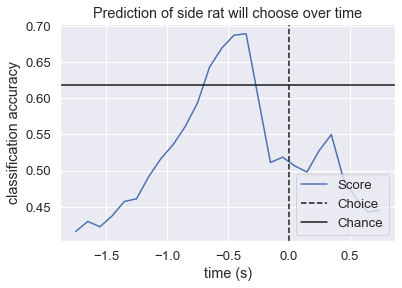

In [39]:
sfreq = d5.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + choice_epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Choice')
#plt.axvline(1.375, linestyle='--', color='r', label='GoCue')

plt.axhline(class_balance, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Prediction of side rat will choose over time')
plt.legend(loc='lower right')
plt.show()


In [40]:
from sklearn import metrics
from mne.decoding import TimeFrequency
lda = LinearDiscriminantAnalysis()
from sklearn.svm import SVC

sv = SVC(gamma='auto',degree=5)
#csp = CSP(n_components=4, reg=0.5, log=True, norm_trace=False)
#frequencies = np.arange(8., 40., 1)
#tf = TimeFrequency(frequencies,ed.info['sfreq'],method='morlet', n_cycles=1, time_bandwidth=None, use_fft=True, decim=1, output='power', n_jobs=1, verbose=None)
#vv = Vectorizer()
clf = make_pipeline(
#    Vectorizer(),
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

AUC1 = []
full_epochs_data = choice_epochs.get_data()
full_epochs_data = full_epochs_data[:,0:1,:]
for i in range(27):
    #epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8+i*0.1)
    sel_epochs_train = choice_epochs.copy().crop(tmin=0, tmax=0.2)

    scores = []

    labels = choice_epochs.events[:, -1] 

    #epochs_train = choice_epochs.copy().crop(tmin=-2, tmax=-1.8)
    sel_epochs_data_train = sel_epochs_train.get_data()
    sel_epochs_data_train = sel_epochs_data_train[:,0:1,:]
    cv = ShuffleSplit(10, test_size=0.3, random_state=42)
    cv_split = cv.split(sel_epochs_data_train)
  
    sfreq = d5.info['sfreq']
    w_length = int(sfreq * 0.2)   # running classifier: window length
    w_step = int(sfreq * 0.01)  # running classifier: window step size
    w_start = np.arange(0, full_epochs_data.shape[2] - w_length, w_step)

    scores_windows = []

    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]

        #X_train = vv.fit_transform(sel_epochs_data_train[train_idx], y_train)
        #X_test = csp.transform(epochs_data_train[test_idx])
        #print(X_train.shape)
        X_train = sel_epochs_data_train[train_idx]
        X_train = np.reshape(X_train, (X_train.shape[0],-1))
        #print(X_train.shape)

        # fit classifier
        clf.fit(X_train, y_train)

        # running classifier: test classifier on sliding window
        score_this_window = []
        for n in w_start:
            #X_test = vv.transform(full_epochs_data[test_idx][:, :, n:(n + w_length+1)])
            X_test = full_epochs_data[test_idx][:, :, n:(n + w_length+1)]

            #print(X_test.shape)

            X_test = np.reshape(X_test, (X_test.shape[0],-1))

            pred = clf.predict(X_test)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
            score = metrics.auc(fpr, tpr)
            #print(score)
            score_this_window.append(score)
        scores_windows.append(score_this_window)

    # Plot scores over time
    w_times = (w_start + w_length / 2.) / sfreq + choice_epochs.tmin
    AUC = np.mean(scores_windows, 0)
    AUC1.append(AUC)

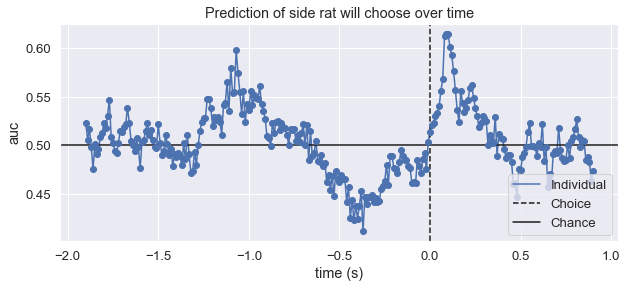

In [41]:
plt.figure(figsize=(10,4))
e1 = np.std(AUC1,axis=0, ddof=1) / np.sqrt(np.size(AUC1))


plt.plot(w_times, np.mean(AUC1, 0), label='Individual')

plt.axvline(0, linestyle='--', color='k', label='Choice')
#plt.axvline(1.375, linestyle='--', color='r', label='GoCue')
plt.errorbar(w_times, np.mean(AUC1, 0), yerr=e1, fmt='bo', ecolor = 'blue')

plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('auc')
plt.title('Prediction of side rat will choose over time')
plt.legend(loc='lower right')
plt.show()

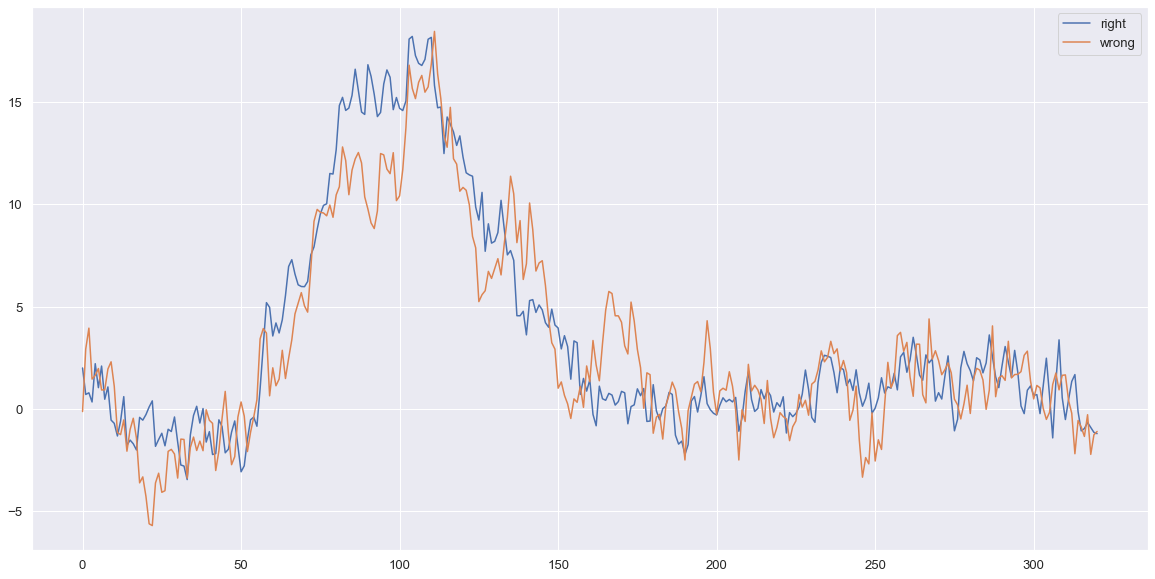

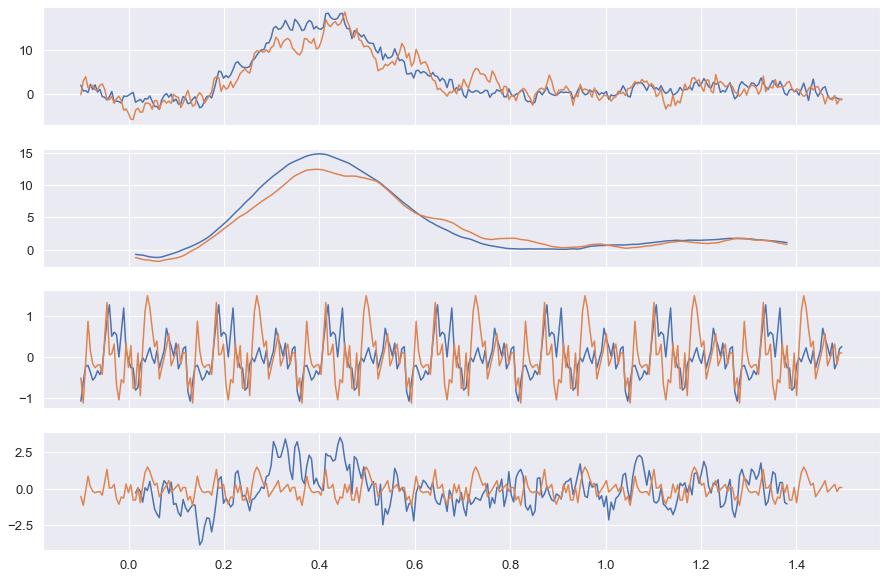

In [13]:
idx1 = np.where(labels==1)
idx2 = np.where(labels==0)

#print(idx3[0])
#st_power, itc, freqs, time = mne_stockell_power(epochs_data_train[idx3[0],0:1,:],200,freq_range = [20,100])
#plot_spectrograms(st_power, freqs,time)
e = 1000000*epochs_data_train[idx1[0],0,:]
d = 1000000*epochs_data_train[idx2[0],0,:]
e = np.mean(e,axis=0)
d = np.mean(d,axis=0)

#print(e.shape)
plt.figure(figsize=(20, 10))
plt.plot(e,label='right')
plt.plot(d,label='wrong')
#plt.plot(e[1,:],label='emg')

plt.legend()
plt.show()

#t = np.arange(0, 141, 1, dtype=int)
#b = np.transpose(a)
#print(a.shape)
#print(t.shape)
#a = np.squeeze(a)
#print(np.shape(a))
#s = np.stack((t,np.squeeze(b)))
#s = np.transpose(s)
#print(s.shape)
#import pandas as pd
#df = pd.DataFrame(s, columns = ['time','eeg'])

#df.set_index('time',inplace=True)
#df.index=pd.to_datetime(df.index)


from statsmodels.tsa.seasonal import seasonal_decompose
series5 = np.transpose(e)
result5 = seasonal_decompose(series5, model='additive',period=round(321/7))

series4 = np.transpose(d)
result4 = seasonal_decompose(series4, model='additive',period=round(321/7))

fig, ax = plt.subplots(4, 1, figsize=(15, 10),sharex=True)
ax[0].plot(np.arange(-0.1,1.5,1.6/321),result5.observed,label='r')
ax[0].plot(np.arange(-0.1,1.5,1.6/321),result4.observed,label='w')

ax[1].plot(np.arange(-0.1,1.5,1.6/321),result5.trend,label='r')
ax[1].plot(np.arange(-0.1,1.5,1.6/321),result4.trend,label='w')

ax[2].plot(np.arange(-0.1,1.5,1.6/321),result5.seasonal,label='r')
ax[2].plot(np.arange(-0.1,1.5,1.6/321),result4.seasonal,label='w')


ax[3].plot(np.arange(-0.1,1.5,1.6/321),result5.resid,label='r')
ax[3].plot(np.arange(-0.1,1.5,1.6/321),result4.seasonal,label='w')


(321,)
(249,)


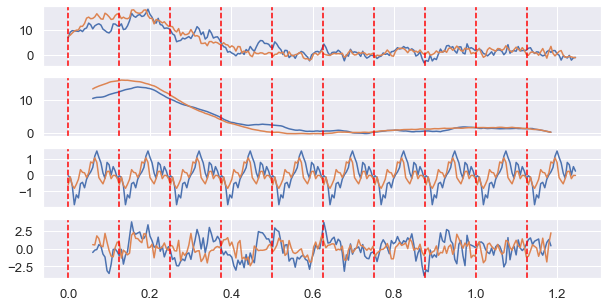

In [14]:
idx1 = np.where(labels==0)
idx2 = np.where(labels==1)
e = 1000000*epochs_data_train[idx1[0],0,:]
d = 1000000*epochs_data_train[idx2[0],0,:]
e = np.mean(e,axis=0)
d = np.mean(d,axis=0)

print(e.shape)
timesampled = e.shape[0]
timestart = 0.1+0.125

timestop = 1.375-0.125

e = e[int(timestart*timesampled):int(timestop*timesampled),]
d = d[int(timestart*timesampled):int(timestop*timesampled),]
print(e.shape)
from statsmodels.tsa.seasonal import seasonal_decompose
series5 = np.transpose(e)
result5 = seasonal_decompose(series5, model='additive',period=round(e.shape[0]/10))

series4 = np.transpose(d)
result4 = seasonal_decompose(series4, model='additive',period=round(e.shape[0]/10))

fig, ax = plt.subplots(4, 1, figsize=(10, 5),sharex=True)
ax[0].plot(np.arange(0,timestop,timestop/e.shape[0]),result5.observed,label='r')
ax[0].plot(np.arange(0,timestop,timestop/e.shape[0]),result4.observed,label='w')
#ax[0].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[0].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[1].plot(np.arange(0,timestop,timestop/e.shape[0]),result5.trend,label='r')
ax[1].plot(np.arange(0,timestop,timestop/e.shape[0]),result4.trend,label='w')
#ax[1].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[1].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[2].plot(np.arange(0,timestop,timestop/e.shape[0]),result5.seasonal,label='r')
ax[2].plot(np.arange(0,timestop,timestop/e.shape[0]),result4.seasonal,label='w')
#ax[2].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[2].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')


ax[3].plot(np.arange(0,timestop,timestop/e.shape[0]),result5.resid,label='r')
ax[3].plot(np.arange(0,timestop,timestop/e.shape[0]),result4.resid,label='w')
#ax[3].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[3].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')


(249,)


Text(0.5, 0, 't(s)')

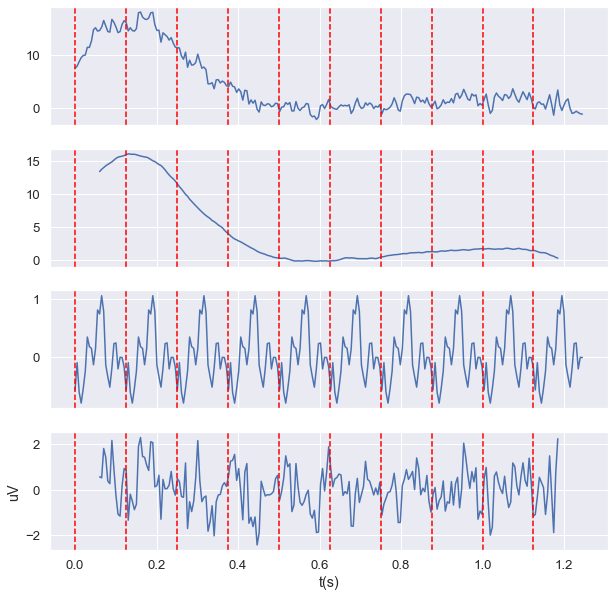

In [45]:
idx2 = np.where(labels==1)
d = 1000000*epochs_data_train[idx2[0],0,:]
d = np.mean(d,axis=0)

timesampled = d.shape[0]
timestart = 0.1+0.125

timestop = 1.375-0.125
d = d[int(timestart*timesampled):int(timestop*timesampled),]
print(e.shape)
from statsmodels.tsa.seasonal import seasonal_decompose

series4 = np.transpose(d)
result4 = seasonal_decompose(series4, model='additive',period=round(e.shape[0]/10))

fig, ax = plt.subplots(4, 1, figsize=(10, 10),sharex=True)
ax[0].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.observed,label='r')
#ax[0].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[0].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[1].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.trend,label='r')
#ax[1].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[1].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[2].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.seasonal,label='r')
#ax[2].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[2].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')


ax[3].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.resid,label='r')
#ax[3].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[3].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')
ax[3].set_ylabel("uV")
ax[3].set_xlabel("t(s)")
#ax[3].legend()

(249,)


Text(0.5, 0, 't(s)')

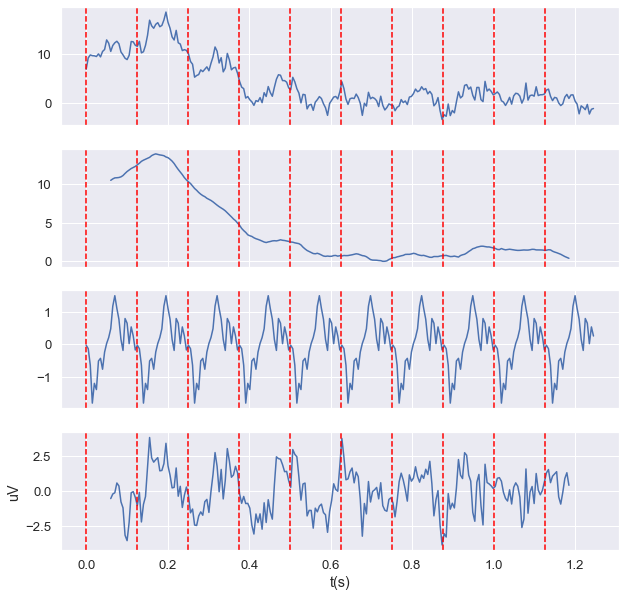

In [55]:
idx2 = np.where(labels==0)
d = 1000000*epochs_data_train[idx2[0],0,:]
d = np.mean(d,axis=0)

timesampled = d.shape[0]
timestart = 0.1+0.125

timestop = 1.375-0.125
d = d[int(timestart*timesampled):int(timestop*timesampled),]
print(e.shape)
from statsmodels.tsa.seasonal import seasonal_decompose

series4 = np.transpose(d)
result4 = seasonal_decompose(series4, model='additive',period=round(e.shape[0]/10))

fig, ax = plt.subplots(4, 1, figsize=(10, 10),sharex=True)
ax[0].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.observed,label='r')
#ax[0].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[0].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[1].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.trend,label='r')
#ax[1].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[1].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')

ax[2].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.seasonal,label='r')
#ax[2].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[2].axvline( 0.115*(i) + 0.01*(i), linestyle='--', color='red')


ax[3].plot(np.arange(0,timestop,timestop/d.shape[0]),result4.resid,label='r')
#ax[3].axvline(1.375, linestyle='--', color='k', label='Choice')
for i in range(10):
    ax[3].axvline(0.115*(i) + 0.01*(i), linestyle='--', color='red')
ax[3].set_ylabel("uV")
ax[3].set_xlabel("t(s)")
#ax[3].legend()

No handles with labels found to put in legend.


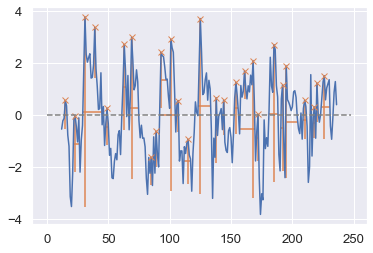

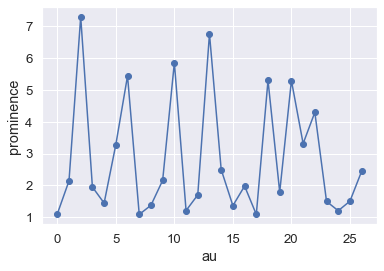

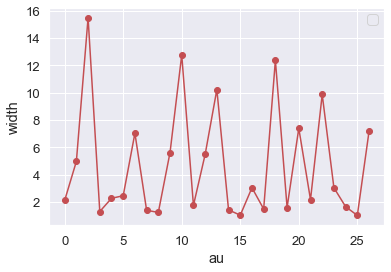

In [56]:
from scipy.signal import find_peaks
x = result4.resid
plt.figure()
#peaks, properties = find_peaks(x, height=2)
plt.plot(x)
#plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#plt.show()
#plt.figure()
peaks, properties = find_peaks(x, prominence=1, width=1)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")

plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")


#peaks, properties = find_peaks(x, prominence=2, width=1)
p0 = properties["prominences"]
w0 = properties["widths"]
plt.figure()
plt.plot(p0,'bo-')
plt.xlabel("au")
plt.ylabel("prominence")
plt.figure()
plt.plot(w0,'ro-')
plt.xlabel("au")
plt.ylabel("width")
plt.legend()
plt.show()

(249,)


Text(0.5, 0, 'time bin')

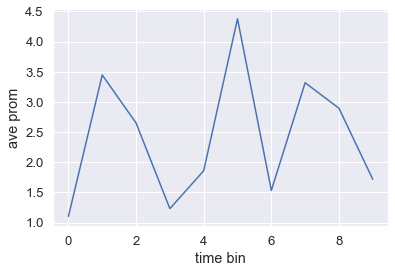

In [57]:
print(x.shape)
timesampled = x.shape[0]
am = []
for i in range(10):
    timestart = i*int(timesampled/10)
    timestop =  (i+1)*int(timesampled/10)
    #print(timestart)
    #print(timestop)
    peaks, properties = find_peaks(x[timestart:timestop], prominence=1, width=1)
    am.append(np.mean(properties["prominences"]))
plt.plot(am)
plt.ylabel("ave prom")
plt.xlabel("time bin")